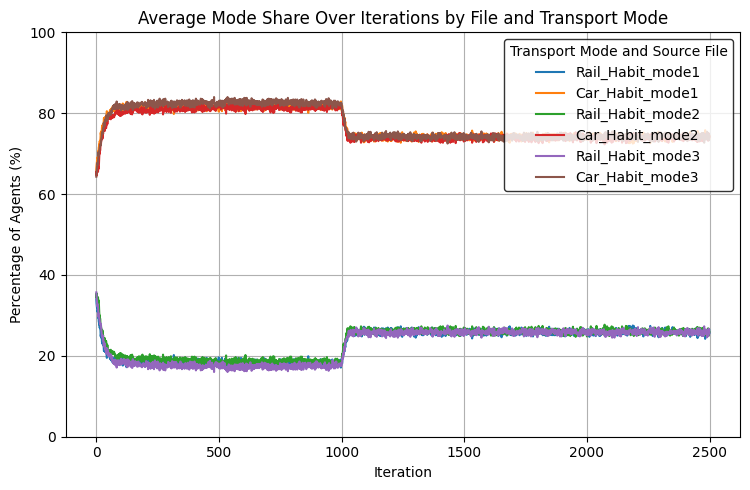

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 파일 리스트와 데이터프레임 리스트
file_names = ['Habit_mode1.csv', 'Habit_mode2.csv','Habit_mode3.csv']
dataframes = [pd.read_csv(file_name) for file_name in file_names]

# 넓은 그래프 크기 설정 (예: 24x8 인치)
fig_width, fig_height = 7.6 , 5

# 각 파일에 대해 'S6' 포함 여부로 운송 모드를 분류하고 그룹화
transport_modes = []
for df, file_name in zip(dataframes, file_names):
    df['Transport Mode'] = df['Route'].apply(lambda x: 'rail' if 'S6' in x else 'car')
    df_transport_mode = df.groupby(['Iteration', 'Transport Mode']).size().unstack(fill_value=0)
    
    # 전체 에이전트 수로 나눠 백분율 계산
    df_transport_mode_percentage = df_transport_mode.div(df_transport_mode.sum(axis=1), axis=0) * 100
    transport_modes.append((df_transport_mode_percentage, file_name))

# 데이터 시각화 (fig_width와 fig_height 사용)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# 각 파일의 데이터와 라벨을 추가
for df_transport_mode_percentage, file_name in transport_modes:
    label_name = file_name.split(".")[0]  # 확장자를 제외한 파일명
    df_transport_mode_percentage['rail'].plot(kind='line', ax=ax, label=f'Rail_{label_name}')
    df_transport_mode_percentage['car'].plot(kind='line', ax=ax, label=f'Car_{label_name}')

# 축 및 레이블 설정
ax.set_title('Average Mode Share Over Iterations by File and Transport Mode')
ax.set_xlabel('Iteration')
ax.set_ylabel('Percentage of Agents (%)')
ax.set_ylim(0, 100)  # y축을 0에서 100으로 설정
ax.grid(True)

# 범례를 그래프 오른쪽 위 안쪽에 고정
ax.legend(
    title='Transport Mode and Source File',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)
plt.tight_layout()



# 그래프를 저장하고 표시
plt.savefig('Average Mode Share Over Iterations by File and Transport.png')
plt.show()


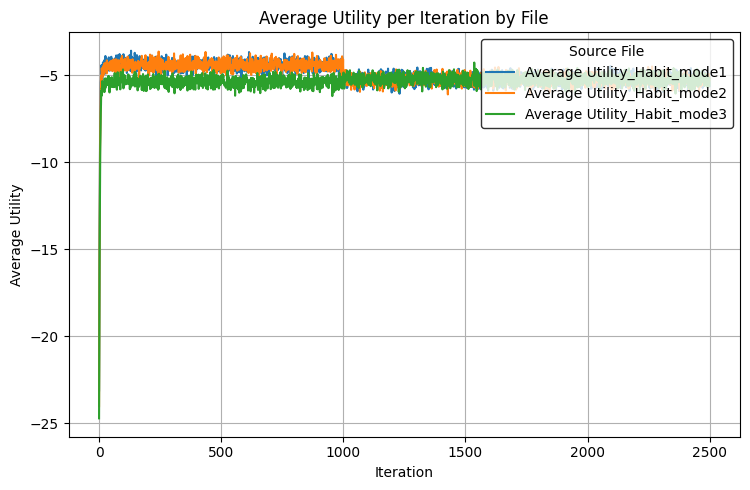

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (파일명을 자신의 파일로 변경하세요)
file_names = ['Habit_mode1.csv', 'Habit_mode2.csv','Habit_mode3.csv']
dataframes = [pd.read_csv(file_name) for file_name in file_names]

# 넓은 그래프 크기 설정 (예: 24x8 인치)
fig_width, fig_height = 7.6 , 5

# 반복별 평균 유틸리티 계산 및 데이터 저장
average_utilities = []
for df, file_name in zip(dataframes, file_names):
    df_average_utility = df.groupby('Iteration')['Total Utility'].mean()  # 평균 계산
    average_utilities.append((df_average_utility, file_name))

# 데이터 시각화 설정
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# 그래프에 각 파일의 데이터 추가
for df_average_utility, file_name in average_utilities:
    linestyle = '--' if 'Normal' in file_name else '-'  # 'Normal' 파일은 점선으로 표시
    label_name = file_name.split(".")[0]  # 확장자를 제외한 파일명
    df_average_utility.plot(ax=ax, label=f'Average Utility_{label_name}', linestyle=linestyle)

# 축 및 레이블 설정
ax.set_title("Average Utility per Iteration by File")
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Utility')
#ax.set_ylim(-2500, -200)  # y축을 -2500에서 -200으로 설정 (데이터에 맞게 조정)
ax.grid(True)

# 범례를 그래프 오른쪽 위 안쪽에 고정
ax.legend(
    title='Source File',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()
plt.savefig('Average Utility per Iteration by File.png')
plt.show()
